In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('..'))
from kans import TaylorKAN
from kans.utils import create_dataset

torch.set_default_dtype(torch.float64)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [2]:
# Generate dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
print('train_input size:', dataset['train_input'].shape)
print('train_label',dataset['train_label'].shape)
print('test_input size:', dataset['test_input'].shape)
print('test_label',dataset['test_label'].shape)

# Create data loader
train_dataset = TensorDataset(dataset['train_input'], dataset['train_label'])
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

train_input size: torch.Size([1000, 2])
train_label torch.Size([1000, 1])
test_input size: torch.Size([1000, 2])
test_label torch.Size([1000, 1])


In [3]:
# Create model
layer_sizes = [2,5,3,1]  # Specify the number of nodes per layer
order = 5  # Order of Taylor series

model = TaylorKAN(layer_sizes, order)
model.to(device)

# Optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [4]:
# Training process
num_epochs = 50
epoch_losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Record loss
        running_loss += loss.item()
        
        # Print information every certain steps
        # if (i + 1) % 10 == 0:
            # print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}")
    
    # Print the average loss of the epoch
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}] completed. Average Loss: {epoch_loss:.4f}")
    epoch_losses.append(epoch_loss)

# Save the model
torch.save(model.state_dict(), 'model/taylor_kan_model.pth')

Epoch [1/50] completed. Average Loss: 3.2828
Epoch [2/50] completed. Average Loss: 0.6450
Epoch [3/50] completed. Average Loss: 0.1521
Epoch [4/50] completed. Average Loss: 0.1213
Epoch [5/50] completed. Average Loss: 0.0941
Epoch [6/50] completed. Average Loss: 0.0795
Epoch [7/50] completed. Average Loss: 0.0544
Epoch [8/50] completed. Average Loss: 0.0409
Epoch [9/50] completed. Average Loss: 0.0270
Epoch [10/50] completed. Average Loss: 0.0212
Epoch [11/50] completed. Average Loss: 0.0300
Epoch [12/50] completed. Average Loss: 0.0647
Epoch [13/50] completed. Average Loss: 0.0606
Epoch [14/50] completed. Average Loss: 0.0220
Epoch [15/50] completed. Average Loss: 0.0165
Epoch [16/50] completed. Average Loss: 0.0220
Epoch [17/50] completed. Average Loss: 0.0117
Epoch [18/50] completed. Average Loss: 0.0219
Epoch [19/50] completed. Average Loss: 0.0148
Epoch [20/50] completed. Average Loss: 0.0118
Epoch [21/50] completed. Average Loss: 0.0069
Epoch [22/50] completed. Average Loss: 0.00

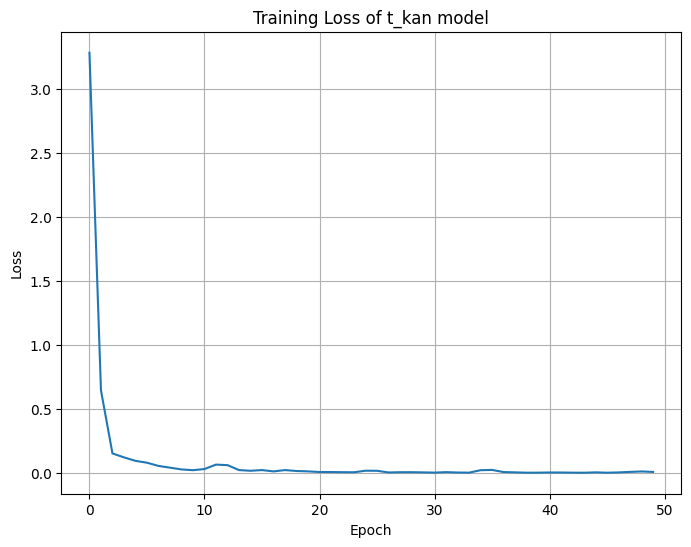

In [5]:
# Plot the loss curve
plt.figure(figsize=(8,6))
plt.plot(epoch_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss of t_kan model')
plt.grid(True)
plt.show()

In [6]:
# Load the model
model = TaylorKAN(layer_sizes, order)
model.load_state_dict(torch.load('model/taylor_kan_model.pth'))

<All keys matched successfully>

In [7]:
# Test the model
model.eval()
test_input = dataset['test_input']
test_label = dataset['test_label']
with torch.no_grad():
	test_output = model(test_input)
test_loss = criterion(test_output, test_label).item()
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 0.0083
